In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Nimishkhurana/Linear-Regression/master/housingdata.csv")
data.head()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [3]:
col_names = ["A","B","C","D","E","F","G","H","I","J","k","L","M","Target"]
data.columns = col_names
data.head()

,A,B,C,D,E,F,G,H,I,J,k,L,M,Target
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
data.info() #no null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
A         505 non-null float64
B         505 non-null float64
C         505 non-null float64
D         505 non-null int64
E         505 non-null float64
F         505 non-null float64
G         505 non-null float64
H         505 non-null float64
I         505 non-null int64
J         505 non-null int64
k         505 non-null float64
L         505 non-null float64
M         505 non-null float64
Target    505 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.3 KB


In [5]:
data.shape

(505, 14)

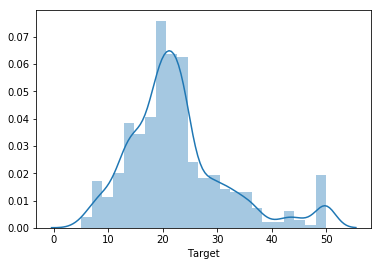

In [6]:
sns.distplot(data['Target'])

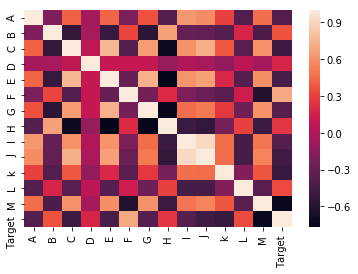

In [7]:
sns.heatmap(data.corr())

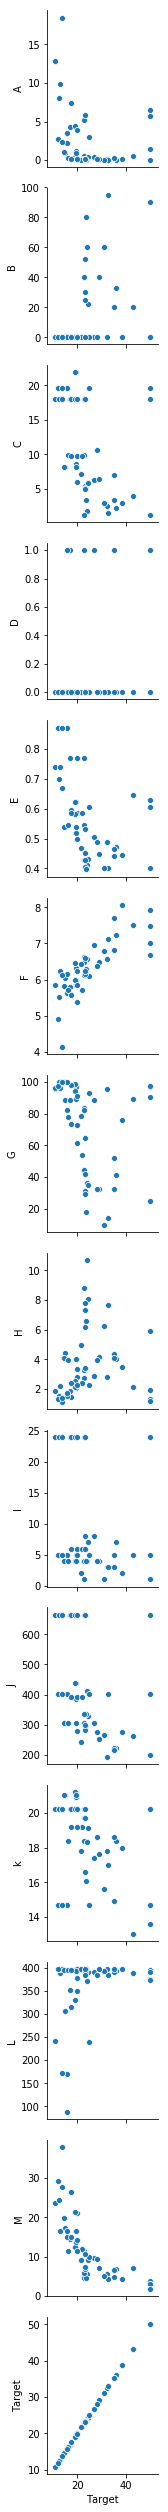

In [8]:
pp = sns.pairplot(data=data.sample(50),x_vars=['Target'],y_vars=['A', 'B', 'C','D','E','F','G','H','I','J','k','L','M','Target'])

In [9]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 11 , test_size = 0.2)

In [11]:
X_train.shape

(404, 13)

In [12]:
Y_train.shape

(404,)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
prediction = regressor.predict(X_test)

In [14]:
Y_test.shape , prediction.shape

((101,), (101,))

In [15]:
p = pd.DataFrame(Y_test , prediction)
p.reset_index(inplace=True)
p.columns = ["Y_test","prediction"]
p.head()

,Y_test,prediction
0,24.989633,24.8
1,19.145357,19.5
2,12.972273,13.1
3,18.765997,17.8
4,15.923852,17.4


In [18]:
from sklearn.metrics import r2_score
scoreLineer = r2_score(Y_test,prediction,multioutput="variance_weighted")  # First R-Squared
scoreLineer

0.8146963135333379

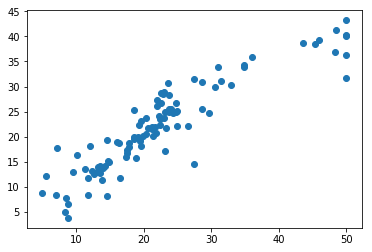

In [24]:
plt.scatter(Y_test,prediction)

/home/shreya/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


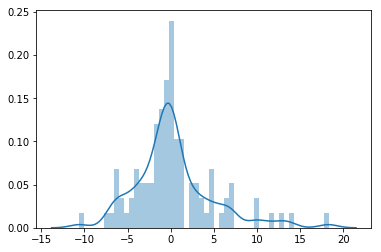

In [25]:
sns.distplot((Y_test-prediction),bins=50);

In [ ]:
#Backward Elimination

